In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

# linear dataset

In [193]:
np.random.seed(42)

In [194]:
X,y = make_blobs(n_samples=500,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

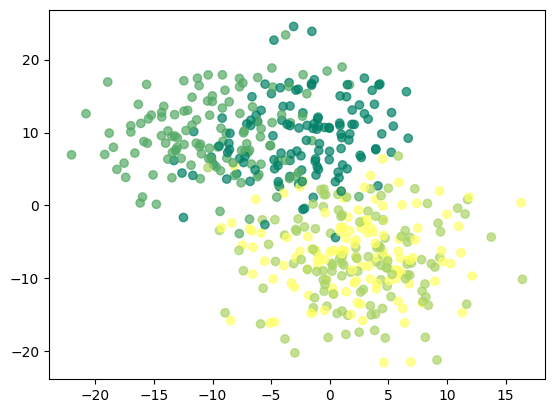

In [195]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

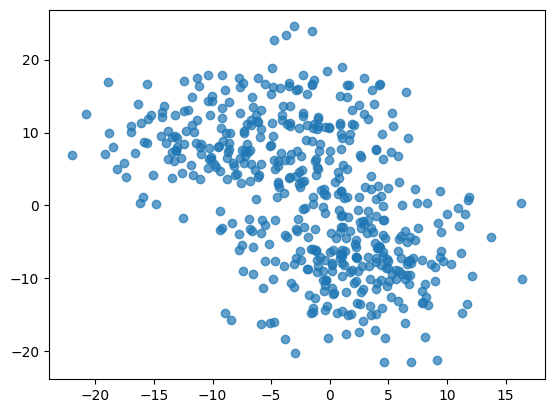

In [196]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [197]:
X.shape

(500, 10)

In [198]:
df_linear = pd.DataFrame(X) 

In [199]:
df_linear.columns = [f"vab_{col+1}" for col in df_linear.columns]

In [200]:
df_linear['target'] = y

In [201]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  
0     3.817842  3.587400 -4.383650  -1.607136       1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3  
2    -9.302836  4.211802 -4.587759  -5.983203       1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2  
4    -5.886460 -4.564809  3.010796  -9.167377       3  
..         ...       ...       ...        ...     ...  
495  -7.168167  5.228464  2.771318  -7.182853       2  
496 -11.446325  5.395608  1.606887  -0.122200       2  
497   1.309891  0.903259  2.360404 -21.488913       2  
498  -5.524547  0.760455 -0.050439   7.297902       1  
499  -0.810328  6.438151  7.111254  -5.241037       3  

[500 rows x 11 columns]

In [202]:
df_linear['target'].value_counts()

target
1    125
3    125
2    125
0    125
Name: count, dtype: int64

In [203]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

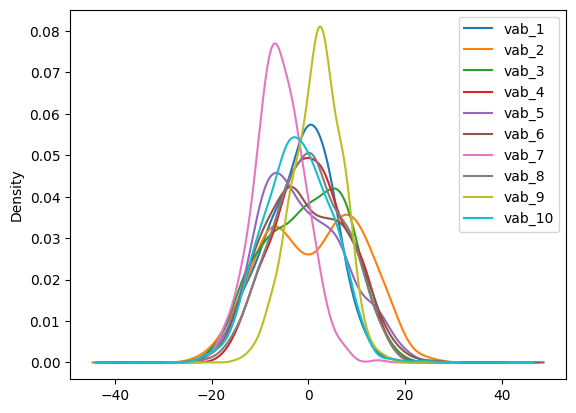

In [204]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [205]:
df_linear.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.486942 -0.447335  0.350051  0.410801  0.452514 -0.075782   
vab_2  -0.486942  1.000000  0.613055 -0.308053 -0.535676 -0.660596 -0.042907   
vab_3  -0.447335  0.613055  1.000000 -0.404254 -0.585948 -0.588399 -0.045079   
vab_4   0.350051 -0.308053 -0.404254  1.000000  0.417966  0.273300 -0.042056   
vab_5   0.410801 -0.535676 -0.585948  0.417966  1.000000  0.522756  0.058207   
vab_6   0.452514 -0.660596 -0.588399  0.273300  0.522756  1.000000  0.006910   
vab_7  -0.075782 -0.042907 -0.045079 -0.042056  0.058207  0.006910  1.000000   
vab_8  -0.211216  0.442483  0.449298 -0.252915 -0.516129 -0.388445 -0.142480   
vab_9   0.229445 -0.203147 -0.257066  0.293808  0.230401  0.217423 -0.039972   
vab_10 -0.140779  0.347897  0.224178  0.237288 -0.100335 -0.325186 -0.116193   

           vab_8     vab_9    vab_10  
vab_1  -0.211216  0.229445 -0.140779  
vab_2   0.442483 -0.203147  0.347897  
vab_3   0.449298 -0.257066  0.224178  
vab_4  -0.252915  0.293808  0.237288  
vab_5  -0.516129  0.230401 -0.100335  
vab_6  -0.388445  0.217423 -0.325186  
vab_7  -0.142480 -0.039972 -0.116193  
vab_8   1.000000 -0.095332  0.161269  
vab_9  -0.095332  1.000000  0.032065  
vab_10  0.161269  0.032065  1.000000

<Axes: >

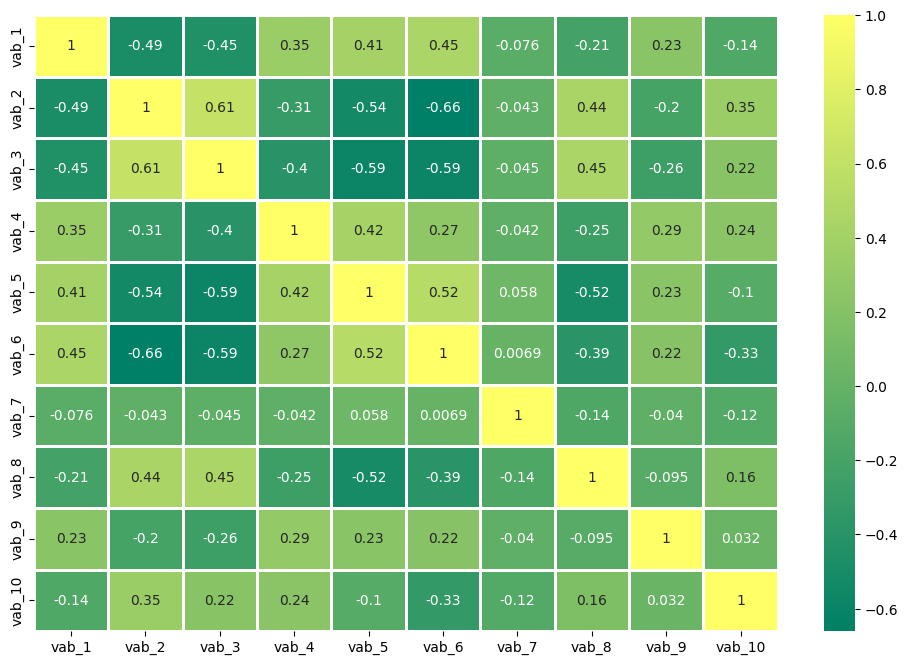

In [206]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [207]:
X_values = df_linear.iloc[:,:-1].values

In [208]:
y_values = df_linear.iloc[:,-1].values

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler = StandardScaler()

In [211]:
X_values = scaler.fit_transform(X_values)

In [212]:
np.mean(X_values),np.std(X_values)

(-1.0373923942097463e-16, 1.0)

In [213]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0   -0.576590  0.834881  1.268863  0.337453 -0.744489 -0.958663  1.865415   
1    0.129787 -0.976571 -0.857178 -0.361571  0.285170  0.370419 -0.423208   
2    0.056346  0.780833  0.767608 -1.674416 -0.989220 -0.552043 -0.656153   
3    0.201845  0.029735 -0.583080 -1.419291  0.579122 -0.194416  0.196365   
4    1.231941 -0.897840 -1.061697  1.034143  0.602032  0.288074  0.000416   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.842091 -0.275115  0.079701  0.498445  0.340091 -0.114117 -0.245907   
496  0.215592 -1.232573 -0.293184 -0.216777 -0.220106  0.738061 -1.068095   
497  1.566573 -0.985485 -1.074626 -1.811564 -0.887315  0.061809  1.383430   
498 -1.790237  1.175916  1.092213 -0.786994 -0.478104  0.297571  0.069969   
499 -0.927441 -0.367789 -1.089171  1.713849  0.990475  0.854217  0.975960   

            7         8         9  
0    0.469103 -1.225911  0.084795  
1   -0.887944 -0.445326 -1.022465  
2    0.553320 -1.266518 -0.552017  
3   -1.333457 -1.172165 -0.902074  
4   -0.630439  0.245180 -1.015383  
..        ...       ...       ...  
495  0.690444  0.197537 -0.726592  
496  0.712988 -0.034121  0.300886  
497  0.107075  0.115788 -2.808434  
498  0.087814 -0.363838  1.380671  
499  0.853602  1.060948 -0.444016  

[500 rows x 10 columns]

## pca application

In [214]:
from sklearn.decomposition import PCA

In [215]:
pca_general = PCA(random_state=42)

In [216]:
pca_general.fit(X_values)

PCA(random_state=42)

In [217]:
explained_variance = pca_general.explained_variance_ratio_

In [218]:
explained_variance

array([0.39005736, 0.14252111, 0.10563451, 0.08503339, 0.06946151,
       0.05063072, 0.0450599 , 0.04128391, 0.03772956, 0.03258804])

In [219]:
eigenvalues = pca_general.explained_variance_

In [220]:
pd.DataFrame(eigenvalues)

0
0  3.908390
1  1.428067
2  1.058462
3  0.852038
4  0.696007
5  0.507322
6  0.451502
7  0.413666
8  0.378052
9  0.326533

In [221]:
eigenvectors = pca_general.components_

### scree plot

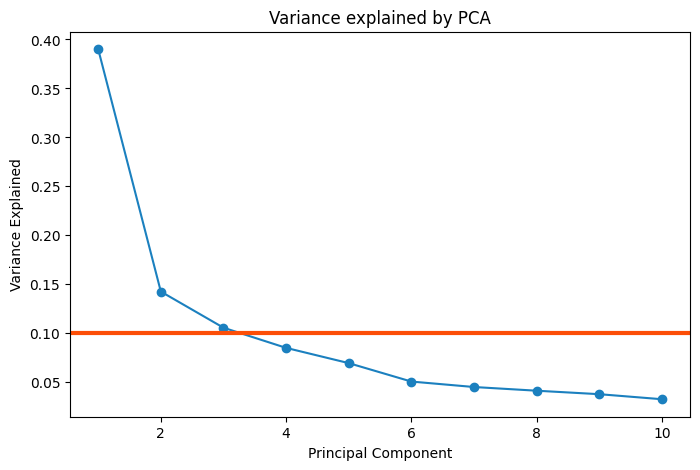

In [222]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [223]:
pca = PCA(n_components=2,random_state=42)

In [224]:
principal_components = pca.fit_transform(X_values)

In [225]:
pd.DataFrame(principal_components).head(8)

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557
5 -1.989787  0.020806
6 -1.598013 -1.305250
7  1.636833 -1.410185

In [226]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [227]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [228]:
final_df

principal component 1  principal component 2  target
0                 1.989103              -0.612637       1
1                -1.304821              -1.155632       3
2                 2.036264              -1.229210       1
3                -0.403509              -1.872577       2
4                -2.248810              -0.115557       3
..                     ...                    ...     ...
495              -0.504194               0.132121       2
496              -0.548141               0.224845       2
497              -1.005734              -3.193659       2
498               2.115411               0.242176       1
499              -1.520633               0.524282       3

[500 rows x 3 columns]

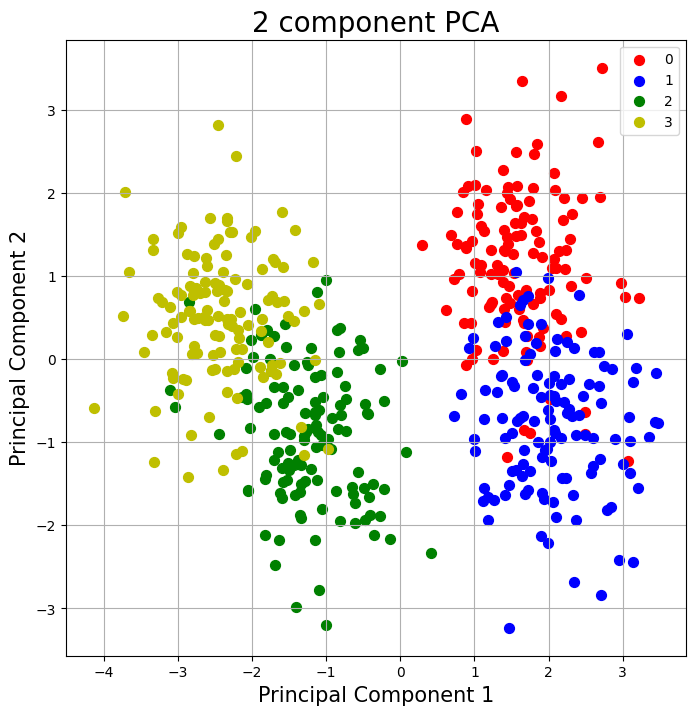

In [229]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

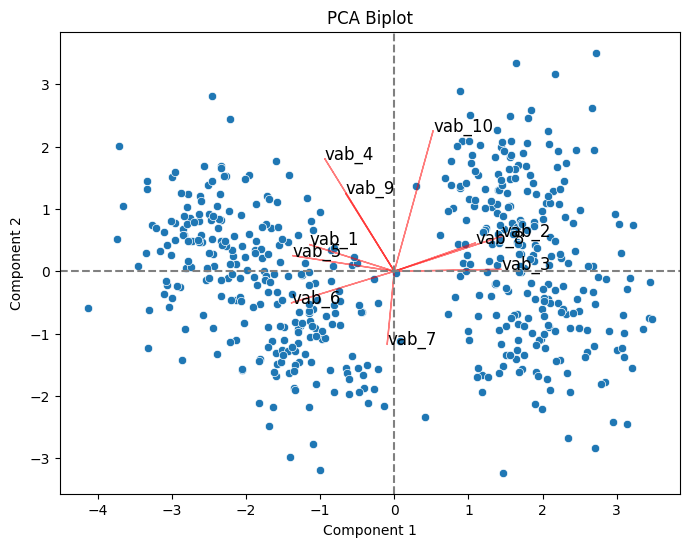

In [230]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

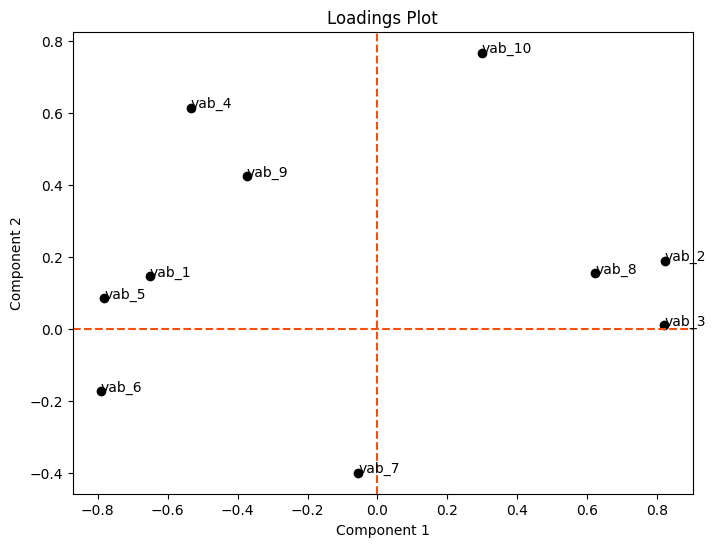

In [231]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [232]:
scores_pca = pca.transform(X_values)

In [233]:
pd.DataFrame(scores_pca).head()

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557

## t-SNE

In [234]:
from sklearn.manifold import TSNE

In [235]:
tsne = TSNE(n_components=2,random_state=42)

In [236]:
X_tsne = tsne.fit_transform(X_values)

In [237]:
tsne_data = np.vstack((X_tsne.T,df_linear['target'])).T

In [238]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [239]:
tsne_df

dim_1     dim_2  target
0    22.521677 -7.862161     1.0
1   -19.921301 -0.889044     3.0
2    18.558737 -5.039337     1.0
3   -17.498144 -6.332827     2.0
4   -24.958900 -0.228695     3.0
..         ...       ...     ...
495 -16.397436  3.715633     2.0
496 -22.392952  4.661265     2.0
497 -12.371681  0.240039     2.0
498  21.446112  3.936818     1.0
499 -30.707745 -8.360952     3.0

[500 rows x 3 columns]

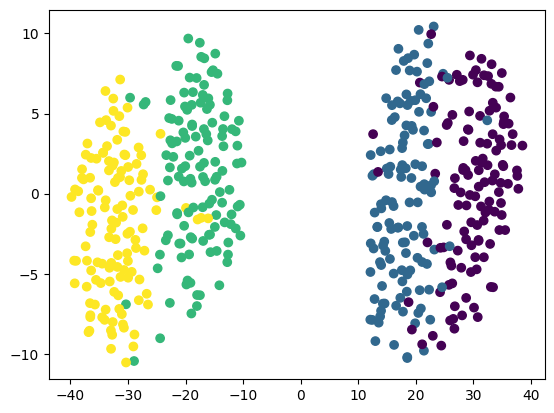

In [240]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [241]:
tsne.kl_divergence_

0.9525728225708008

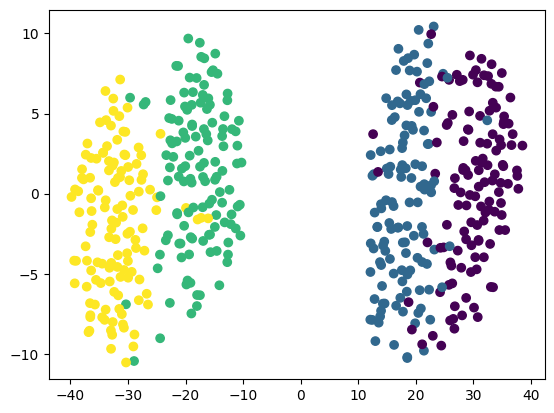

In [242]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [243]:
from sklearn.cluster import KMeans

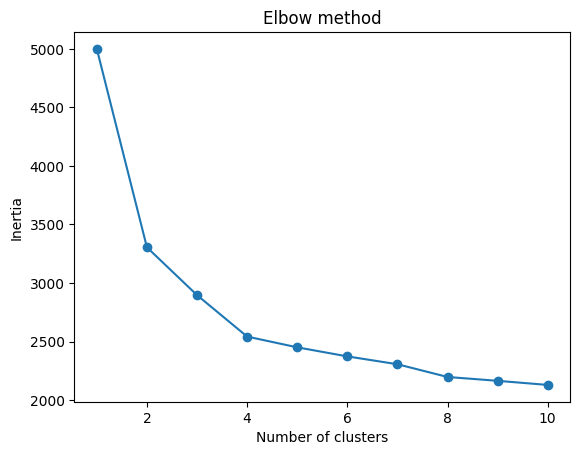

In [244]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [245]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [246]:
kmeans.fit(X_values)

KMeans(n_clusters=4, random_state=42)

In [247]:
df_linear['k_means'] = kmeans.labels_

In [248]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        3  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        0  
2    -9.302836  4.211802 -4.587759  -5.983203       1        3  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        0  
4    -5.886460 -4.564809  3.010796  -9.167377       3        2  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        0  
496 -11.446325  5.395608  1.606887  -0.122200       2        0  
497   1.309891  0.903259  2.360404 -21.488913       2        0  
498  -5.524547  0.760455 -0.050439   7.297902       1        3  
499  -0.810328  6.438151  7.111254  -5.241037       3        2  

[500 rows x 12 columns]

In [249]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.026
accuracy after: 0.932


In [250]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2  
497   1.309891  0.903259  2.360404 -21.488913       2        2  
498  -5.524547  0.760455 -0.050439   7.297902       1        1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [251]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [252]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


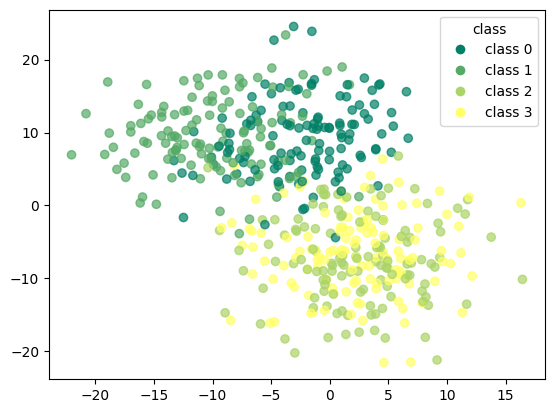

In [253]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

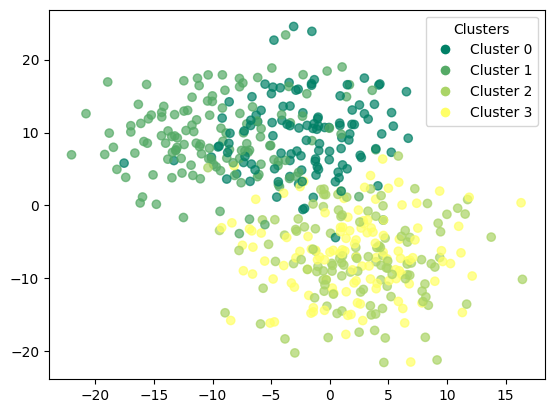

In [254]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [255]:
kmeans.cluster_centers_

array([[ 0.64406258, -0.87245144, -0.47620193, -0.38205445,  0.11768536,
         0.80429741, -0.12912623, -0.0179853 ,  0.14400727, -1.03467965],
       [-0.028313  ,  0.84573376,  0.67751439,  0.23569287, -0.69526307,
        -0.76587931, -0.5121871 ,  0.9661654 ,  0.20900129,  0.97279499],
       [ 0.5547921 , -0.80028645, -1.0305122 ,  1.10034067,  1.24645152,
         0.74297317,  0.23228501, -1.05135961,  0.43379592,  0.17720539],
       [-1.09315862,  0.82772354,  0.82314857, -0.8851384 , -0.67906985,
        -0.77989178,  0.34445854,  0.16885299, -0.72208461, -0.05128224]])

In [256]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[108  17   0   0]
 [  8 117   0   0]
 [  0   0 120   5]
 [  0   0   4 121]]


In [257]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       125
           1       0.87      0.94      0.90       125
           2       0.97      0.96      0.96       125
           3       0.96      0.97      0.96       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



### clustering with pca

In [258]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i,init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

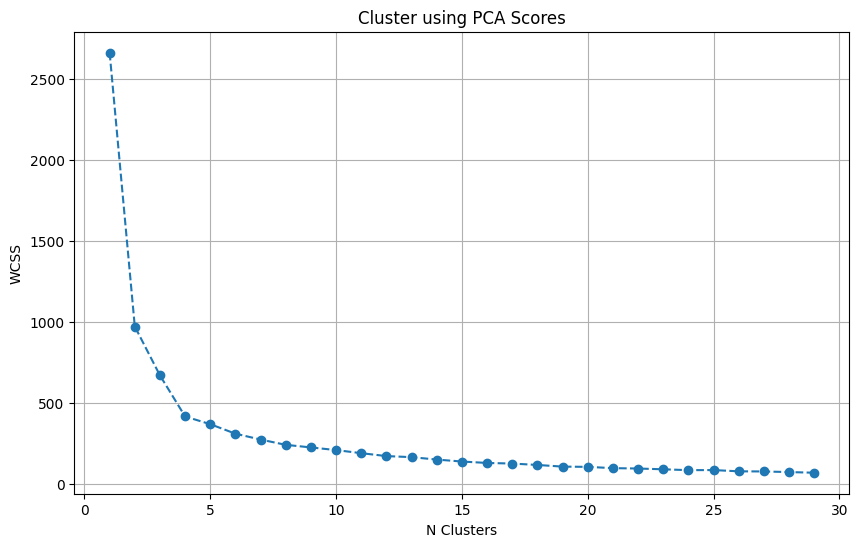

In [259]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o",linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [260]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [261]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [262]:
df_pca_kmeans = df_linear.copy()

In [263]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [264]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        1           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           0  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2           2  
497   1.309891  0.903259  2.360404 -21.488913       2        2           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        1           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           0  

[500 rows x 13 columns]

In [265]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.434
accuracy after: 0.884


In [266]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        1           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           3  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2           2  
497   1.309891  0.903259  2.360404 -21.488913       2        2           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        1           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           3  

[500 rows x 13 columns]

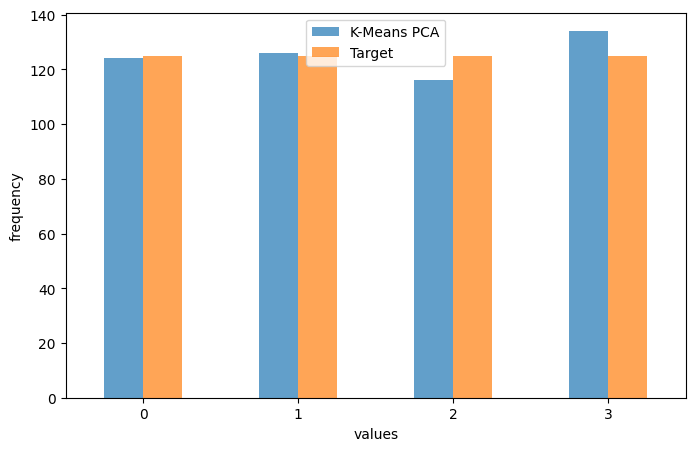

In [267]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [268]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[109  16   0   0]
 [ 15 110   0   0]
 [  0   0 107  18]
 [  0   0   9 116]]


In [269]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.87      0.88      0.88       125
           2       0.92      0.86      0.89       125
           3       0.87      0.93      0.90       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



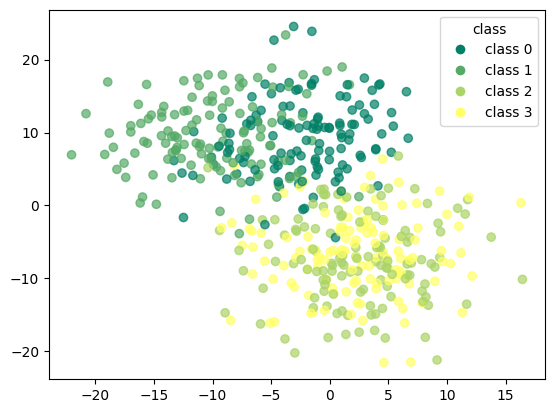

In [270]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

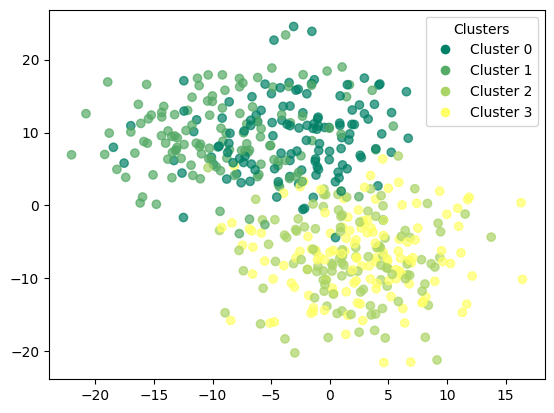

In [271]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

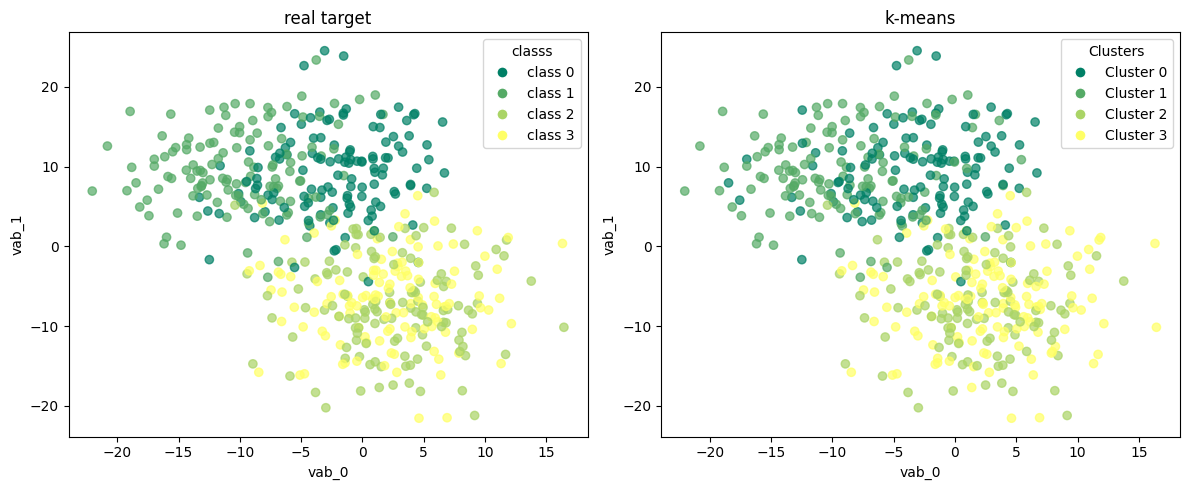

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

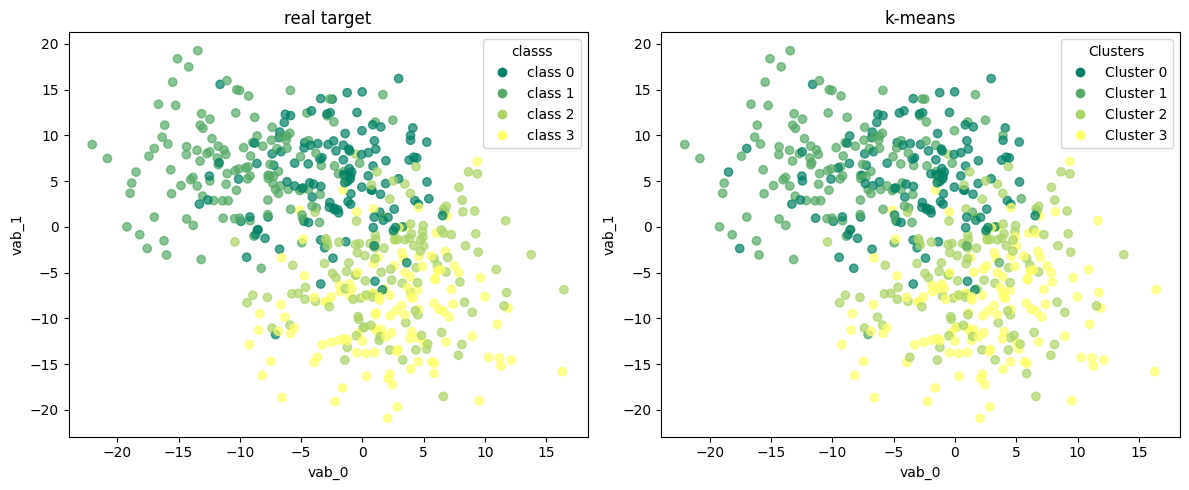

In [273]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

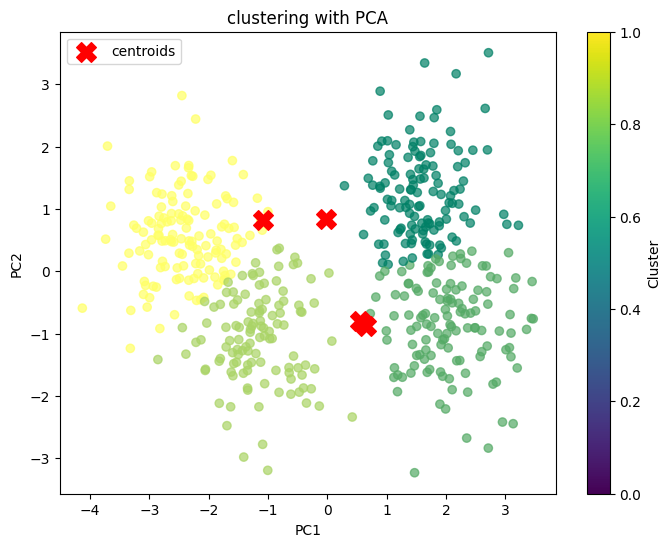

In [274]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

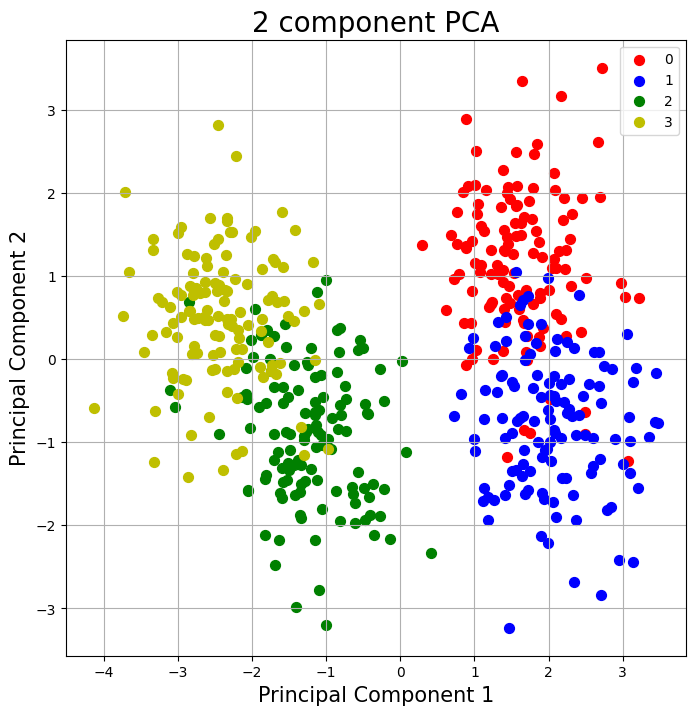

In [275]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [276]:
kmeans_tsne = KMeans(n_clusters=4,init='k-means++')

In [277]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=4)

In [278]:
df_tsne_kmeans = df_linear.copy()

In [279]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [280]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_tsne  
0     3.817842  3.587400 -4.383650  -1.607136       1        1            0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2            1  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1            0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2            1  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3            2  
..         ...       ...       ...        ...     ...      ...          ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2            1  
496 -11.446325  5.395608  1.606887  -0.122200       2        2            1  
497   1.309891  0.903259  2.360404 -21.488913       2        2            1  
498  -5.524547  0.760455 -0.050439   7.297902       1        1            0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3            2  

[500 rows x 13 columns]

In [281]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.048
accuracy after: 0.932


In [282]:
df_tsne_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_tsne  
0     3.817842  3.587400 -4.383650  -1.607136       1        1            1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2            2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        1            1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        2            2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3            3  
..         ...       ...       ...        ...     ...      ...          ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2            2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2            2  
497   1.309891  0.903259  2.360404 -21.488913       2        2            2  
498  -5.524547  0.760455 -0.050439   7.297902       1        1            1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3            3  

[500 rows x 13 columns]

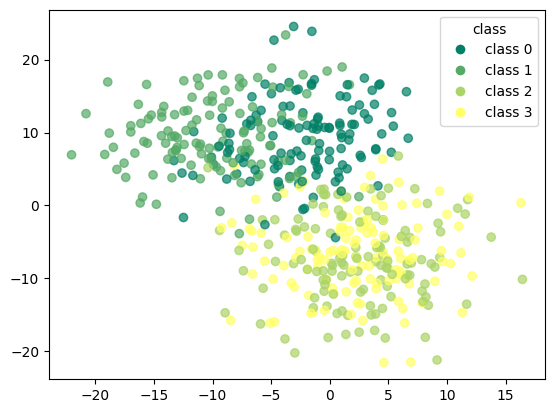

In [283]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

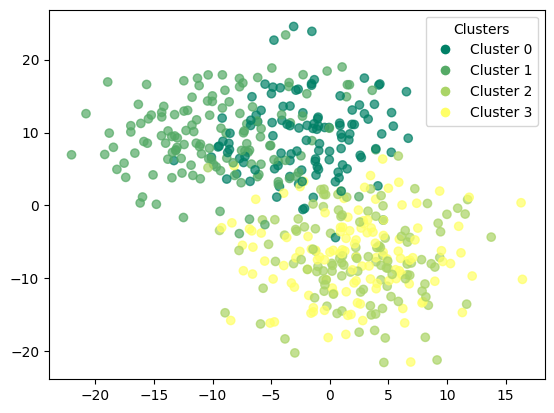

In [284]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

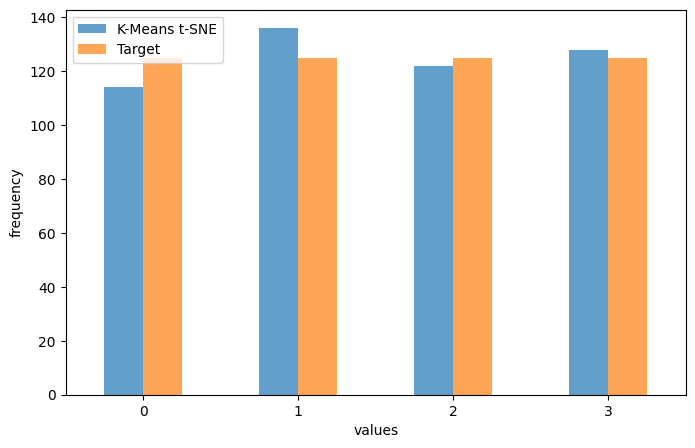

In [285]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [286]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[109  16   0   0]
 [  5 120   0   0]
 [  0   0 117   8]
 [  0   0   5 120]]


In [287]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       125
           1       0.88      0.96      0.92       125
           2       0.96      0.94      0.95       125
           3       0.94      0.96      0.95       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [288]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       125
           1       0.87      0.88      0.88       125
           2       0.92      0.86      0.89       125
           3       0.87      0.93      0.90       125

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



In [289]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       125
           1       0.87      0.94      0.90       125
           2       0.97      0.96      0.96       125
           3       0.96      0.97      0.96       125

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



t-sne with kmeans perform better than pca with kmeans

# non linear dataset - moons

In [290]:
X,y = make_moons(n_samples=500,noise=0.4, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.3,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [291]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  
0   -0.116329  0.120439 -0.435750       1  
1    0.195565  0.134176 -0.002394       0  
2    0.206120  0.217004  0.493615       1  
3    0.211552 -0.669096  0.564241       0  
4   -0.042675  0.454414  0.123202       0  
..        ...       ...       ...     ...  
495  0.101575 -0.724034  0.137405       0  
496 -0.318303  0.099845  0.059909       1  
497  0.083491  0.166666 -0.182538       1  
498 -0.332843  0.228447  0.366129       1  
499 -0.059175 -0.443205  0.170458       0  

[500 rows x 11 columns]

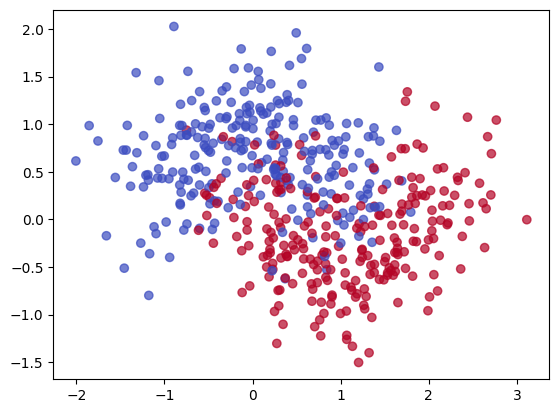

In [292]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [293]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  
0   -0.116329  0.120439 -0.435750       1  
1    0.195565  0.134176 -0.002394       0  
2    0.206120  0.217004  0.493615       1  
3    0.211552 -0.669096  0.564241       0  
4   -0.042675  0.454414  0.123202       0  
..        ...       ...       ...     ...  
495  0.101575 -0.724034  0.137405       0  
496 -0.318303  0.099845  0.059909       1  
497  0.083491  0.166666 -0.182538       1  
498 -0.332843  0.228447  0.366129       1  
499 -0.059175 -0.443205  0.170458       0  

[500 rows x 11 columns]

### correlation matrix

In [294]:
df_moons.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.313172  0.080403 -0.062839 -0.006553 -0.021301 -0.043367   
vab_2  -0.313172  1.000000  0.018343  0.070913  0.040531  0.022200 -0.032314   
vab_3   0.080403  0.018343  1.000000  0.008818 -0.006528  0.081235 -0.075705   
vab_4  -0.062839  0.070913  0.008818  1.000000 -0.022283 -0.004173  0.030781   
vab_5  -0.006553  0.040531 -0.006528 -0.022283  1.000000 -0.053661 -0.062433   
vab_6  -0.021301  0.022200  0.081235 -0.004173 -0.053661  1.000000  0.062329   
vab_7  -0.043367 -0.032314 -0.075705  0.030781 -0.062433  0.062329  1.000000   
vab_8  -0.084263  0.008382 -0.001400 -0.018105  0.010208  0.041836  0.068986   
vab_9   0.045041 -0.081287  0.026942 -0.093659 -0.032999  0.001040  0.022404   
vab_10  0.016793 -0.092549  0.004622  0.000649 -0.006018  0.021877  0.032297   

           vab_8     vab_9    vab_10  
vab_1  -0.084263  0.045041  0.016793  
vab_2   0.008382 -0.081287 -0.092549  
vab_3  -0.001400  0.026942  0.004622  
vab_4  -0.018105 -0.093659  0.000649  
vab_5   0.010208 -0.032999 -0.006018  
vab_6   0.041836  0.001040  0.021877  
vab_7   0.068986  0.022404  0.032297  
vab_8   1.000000  0.078677 -0.075365  
vab_9   0.078677  1.000000 -0.009926  
vab_10 -0.075365 -0.009926  1.000000

<Axes: >

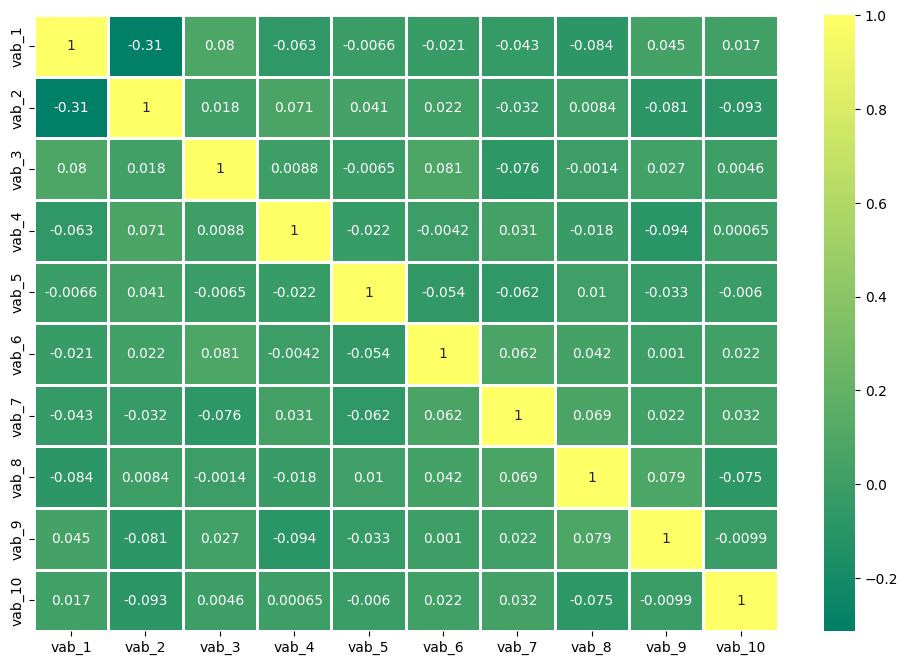

In [295]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [296]:
X_values = df_moons.iloc[:,:-1].values

In [297]:
y_values = df_moons.iloc[:,-1].values

In [298]:
from sklearn.preprocessing import StandardScaler

In [299]:
scaler = StandardScaler()

In [300]:
X_values = scaler.fit_transform(X_values)

In [301]:
np.mean(X_values),np.std(X_values)

(1.1368683772161604e-17, 1.0)

In [302]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0    0.304211 -0.673145 -1.946930 -1.160132  0.476823  1.641766 -1.168602   
1    0.868626  1.063112  0.539320 -2.555815  0.454152 -1.018210 -0.445171   
2    0.706047 -1.063717  0.974472 -1.605998  0.154949 -0.804098  0.979111   
3   -0.456632  1.332519  1.127490 -0.103875 -0.058865  0.649448  0.163673   
4    0.019725  2.167932  0.091218 -1.530334 -1.007465 -2.203361 -1.115411   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.244811  1.232558 -0.688882  0.882751 -0.809146 -0.308722 -0.147980   
496 -0.186495 -0.810391 -0.067832  0.327615  0.464806  0.433022 -2.071927   
497 -0.533311 -0.110667 -0.736173  0.767612 -0.324109  0.947019  1.283642   
498  0.598422 -1.474277  0.899737  0.261780 -0.363909 -1.251986 -0.484641   
499 -0.686113  2.322059  0.923140  2.469945 -0.536155  0.644886 -1.210444   

            7         8         9  
0   -0.356937  0.430536 -1.357156  
1    0.641556  0.476313 -0.028850  
2    0.675347  0.752339  1.491500  
3    0.692736 -2.200582  1.707982  
4   -0.121142  1.543505  0.356125  
..        ...       ...       ...  
495  0.340657 -2.383663  0.399657  
496 -1.003536  0.361906  0.162119  
497  0.282762  0.584586 -0.581021  
498 -1.050083  0.790471  1.100735  
499 -0.173967 -1.447801  0.500972  

[500 rows x 10 columns]

## pca application

In [303]:
from sklearn.decomposition import PCA

In [304]:
pca_general = PCA(random_state=42)

In [305]:
pca_general.fit(X_values)

PCA(random_state=42)

In [306]:
explained_variance = pca_general.explained_variance_ratio_

In [307]:
explained_variance

array([0.1400805 , 0.11846888, 0.11203421, 0.10967859, 0.09875339,
       0.09556248, 0.09210492, 0.08536075, 0.08309511, 0.06486117])

In [308]:
eigenvalues = pca_general.explained_variance_

In [309]:
pd.DataFrame(eigenvalues)

0
0  1.403612
1  1.187063
2  1.122587
3  1.098984
4  0.989513
5  0.957540
6  0.922895
7  0.855318
8  0.832616
9  0.649912

In [310]:
eigenvectors = pca_general.components_

### scree plot

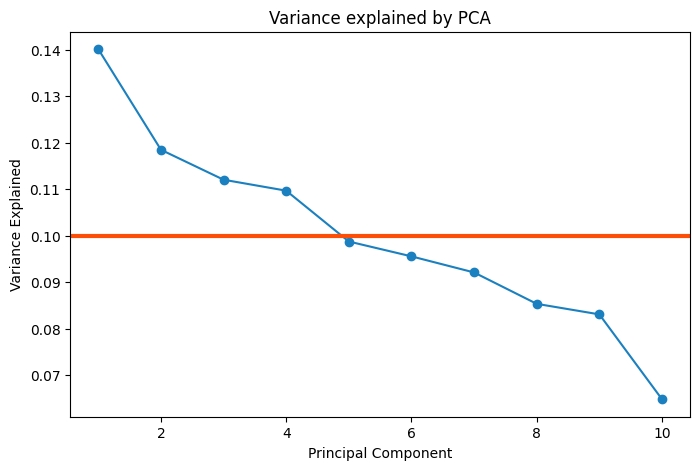

In [311]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [312]:
pca = PCA(n_components=2,random_state=42)

In [313]:
principal_components = pca.fit_transform(X_values)

In [314]:
pd.DataFrame(principal_components).head(8)

0         1
0 -0.543367  0.219193
1 -0.643430 -0.064813
2 -1.985679  0.906327
3  1.311081 -0.434811
4  0.279744 -0.462533
5 -1.685546 -0.464397
6 -0.252187 -1.151979
7  0.805201  1.818083

In [315]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [316]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis = 1)

In [317]:
final_df

principal component 1  principal component 2  target
0                -0.543367               0.219193       1
1                -0.643430              -0.064813       0
2                -1.985679               0.906327       1
3                 1.311081              -0.434811       0
4                 0.279744              -0.462533       0
..                     ...                    ...     ...
495               1.699176              -0.939994       0
496              -0.606824              -1.387729       1
497               0.635296               1.543188       1
498              -1.993240              -0.923136       1
499               2.593346              -1.455641       0

[500 rows x 3 columns]

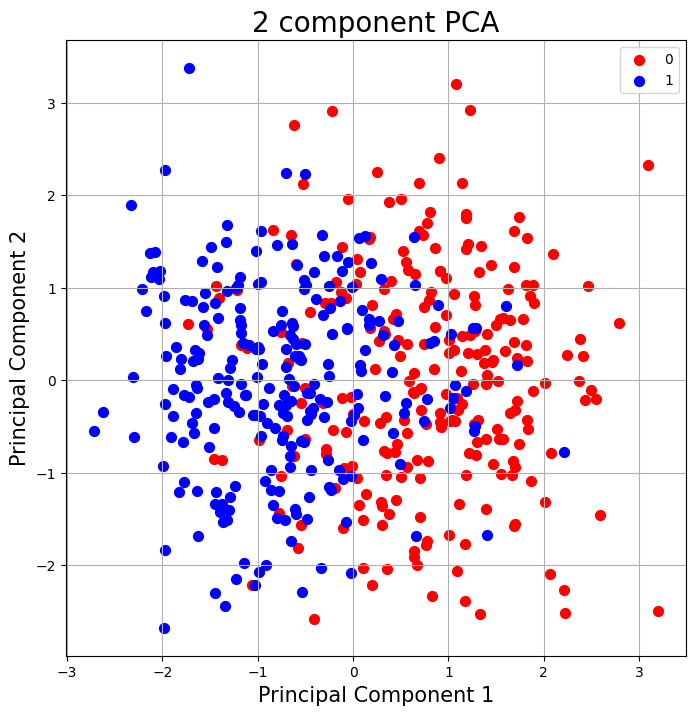

In [318]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

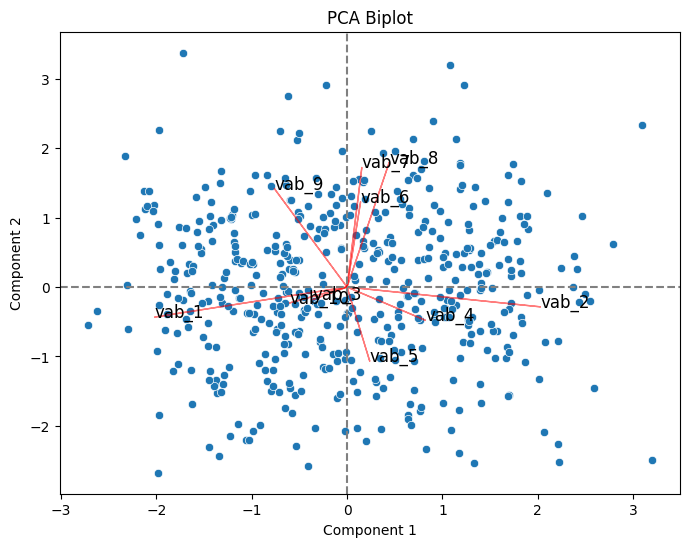

In [319]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

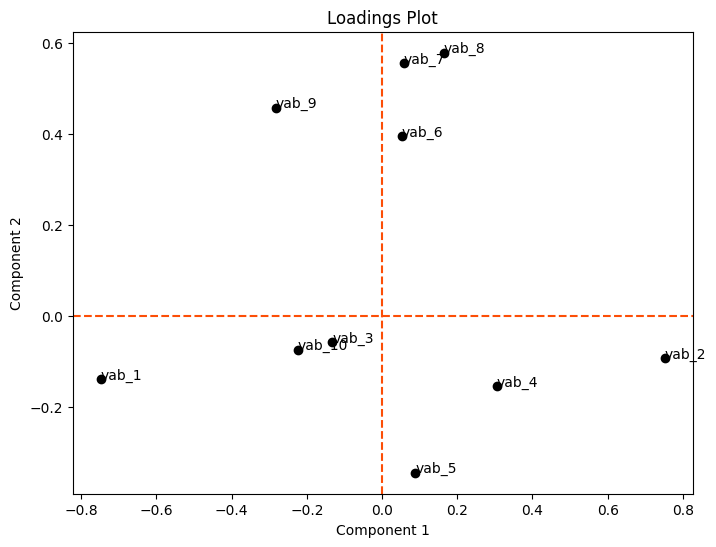

In [320]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [321]:
scores_pca = pca.transform(X_values)

In [322]:
pd.DataFrame(scores_pca).head()

0         1
0 -0.543367  0.219193
1 -0.643430 -0.064813
2 -1.985679  0.906327
3  1.311081 -0.434811
4  0.279744 -0.462533

## t-SNE

In [323]:
tsne = TSNE(n_components=2,random_state=42)

In [324]:
X_tsne = tsne.fit_transform(X_values)

In [325]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [326]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [327]:
tsne_df

dim_1      dim_2  target
0    -5.279199   9.806753     1.0
1     6.563633  10.931298     0.0
2    11.879193  15.491870     1.0
3     2.994364 -20.126566     0.0
4   -12.805722  15.483476     0.0
..         ...        ...     ...
495  -4.859525  -1.225572     0.0
496  10.924233  -8.057460     1.0
497   0.241571   9.941309     1.0
498  12.962270  -8.674009     1.0
499 -18.056906 -12.669885     0.0

[500 rows x 3 columns]

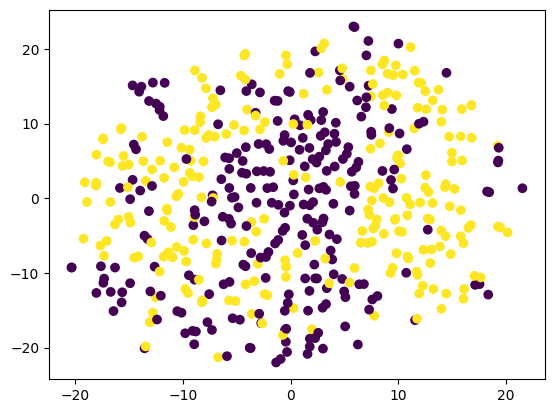

In [328]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [329]:
tsne.kl_divergence_

1.62222158908844

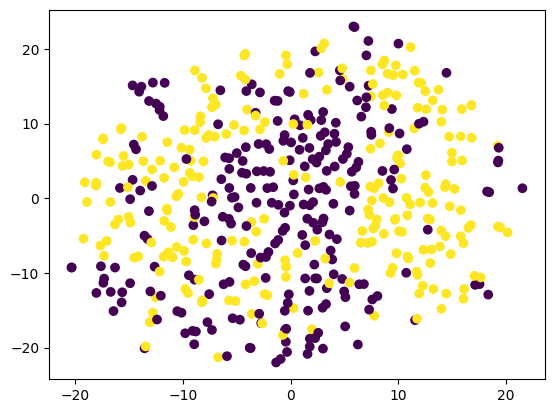

In [330]:
plt.scatter(x=X_tsne[:, 0],y=X_tsne[:, 1],c=y)
plt.show()

## clustering 

In [331]:
from sklearn.cluster import KMeans

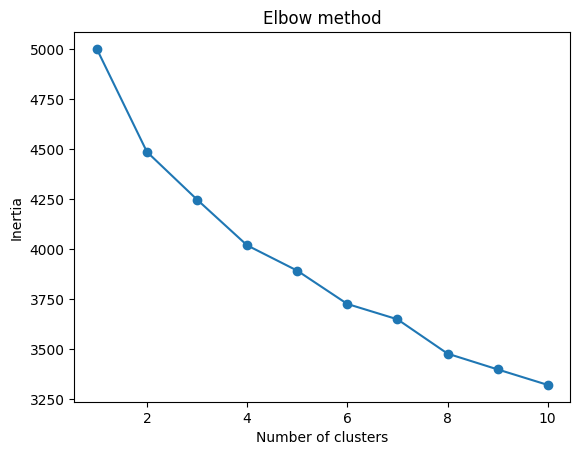

In [332]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [333]:
kmeans = KMeans(n_clusters=2,random_state=42)

In [334]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [335]:
df_moons['k_means'] = kmeans.labels_

In [336]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.116329  0.120439 -0.435750       1        1  
1    0.195565  0.134176 -0.002394       0        1  
2    0.206120  0.217004  0.493615       1        1  
3    0.211552 -0.669096  0.564241       0        0  
4   -0.042675  0.454414  0.123202       0        0  
..        ...       ...       ...     ...      ...  
495  0.101575 -0.724034  0.137405       0        0  
496 -0.318303  0.099845  0.059909       1        1  
497  0.083491  0.166666 -0.182538       1        0  
498 -0.332843  0.228447  0.366129       1        1  
499 -0.059175 -0.443205  0.170458       0        0  

[500 rows x 12 columns]

In [337]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.82
accuracy after: 0.82


In [338]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.116329  0.120439 -0.435750       1        1  
1    0.195565  0.134176 -0.002394       0        1  
2    0.206120  0.217004  0.493615       1        1  
3    0.211552 -0.669096  0.564241       0        0  
4   -0.042675  0.454414  0.123202       0        0  
..        ...       ...       ...     ...      ...  
495  0.101575 -0.724034  0.137405       0        0  
496 -0.318303  0.099845  0.059909       1        1  
497  0.083491  0.166666 -0.182538       1        0  
498 -0.332843  0.228447  0.366129       1        1  
499 -0.059175 -0.443205  0.170458       0        0  

[500 rows x 12 columns]

In [339]:
print(np.unique(df_moons['target']))

[0 1]


In [340]:
print(np.unique(kmeans.labels_))

[0 1]


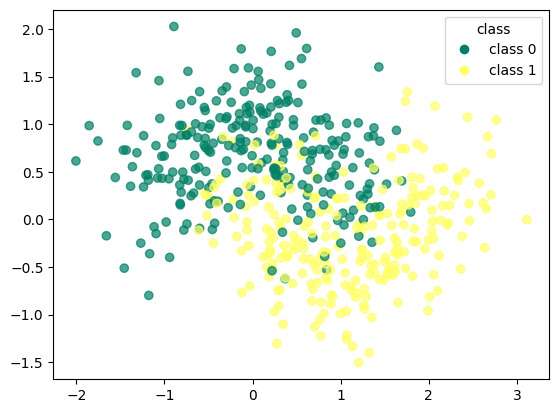

In [341]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

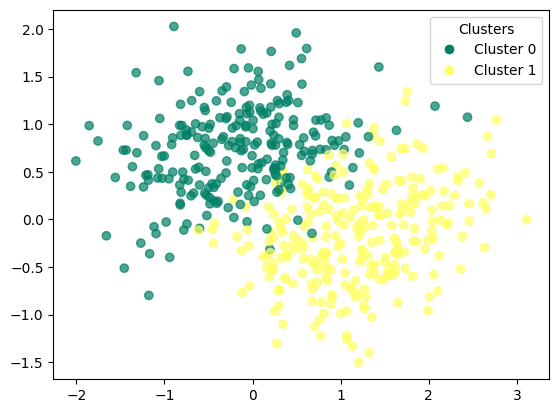

In [342]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [343]:
kmeans.cluster_centers_

array([[-0.72616316,  0.71357503, -0.17786846,  0.19779859, -0.00516111,
         0.03837947,  0.07606205,  0.11682358, -0.1959274 , -0.04173914],
       [ 0.63880519, -0.62773142,  0.15647075, -0.17400327,  0.00454022,
        -0.03376239, -0.06691172, -0.10276962,  0.17235718,  0.03671789]])

In [344]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[197  53]
 [ 37 213]]


In [345]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       250
           1       0.80      0.85      0.83       250

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



### clustering with pca

In [346]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

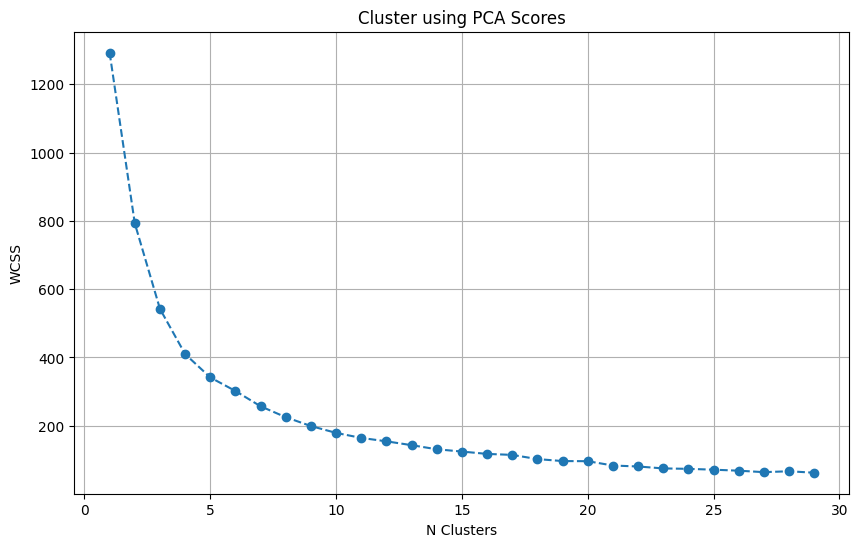

In [347]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [348]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [349]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [350]:
df_pca_kmeans = df_moons.copy()

In [351]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [352]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.116329  0.120439 -0.435750       1        1           1  
1    0.195565  0.134176 -0.002394       0        1           1  
2    0.206120  0.217004  0.493615       1        1           1  
3    0.211552 -0.669096  0.564241       0        0           0  
4   -0.042675  0.454414  0.123202       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495  0.101575 -0.724034  0.137405       0        0           0  
496 -0.318303  0.099845  0.059909       1        1           1  
497  0.083491  0.166666 -0.182538       1        0           0  
498 -0.332843  0.228447  0.366129       1        1           1  
499 -0.059175 -0.443205  0.170458       0        0           0  

[500 rows x 13 columns]

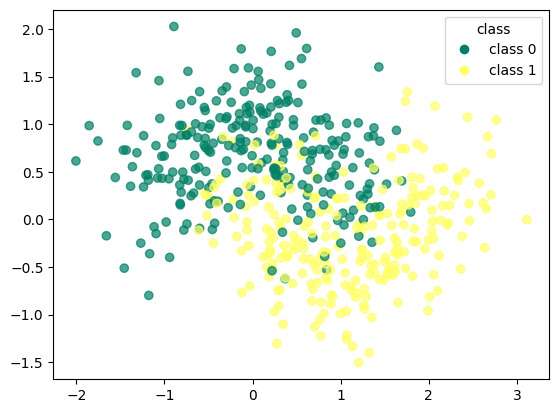

In [353]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

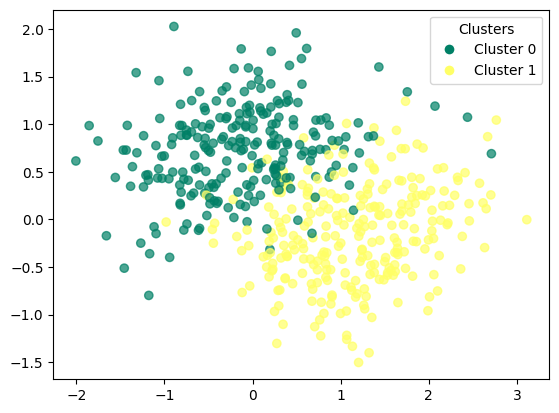

In [354]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [355]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.802
accuracy after: 0.802


In [356]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.116329  0.120439 -0.435750       1        1           1  
1    0.195565  0.134176 -0.002394       0        1           1  
2    0.206120  0.217004  0.493615       1        1           1  
3    0.211552 -0.669096  0.564241       0        0           0  
4   -0.042675  0.454414  0.123202       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495  0.101575 -0.724034  0.137405       0        0           0  
496 -0.318303  0.099845  0.059909       1        1           1  
497  0.083491  0.166666 -0.182538       1        0           0  
498 -0.332843  0.228447  0.366129       1        1           1  
499 -0.059175 -0.443205  0.170458       0        0           0  

[500 rows x 13 columns]

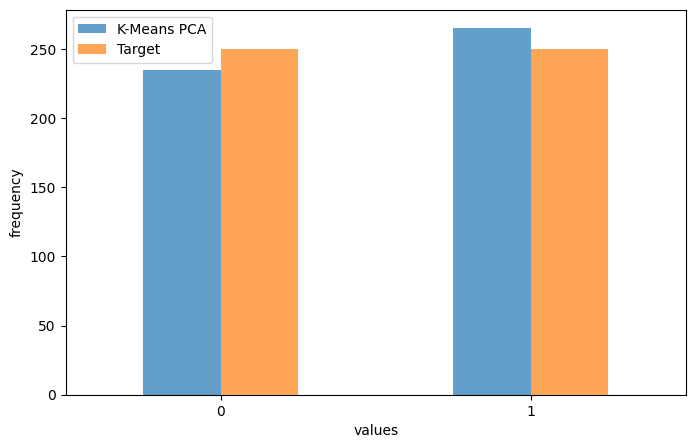

In [357]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [358]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[193  57]
 [ 42 208]]


In [359]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       250
           1       0.80      0.85      0.83       250

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



In [360]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       250
           1       0.78      0.83      0.81       250

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



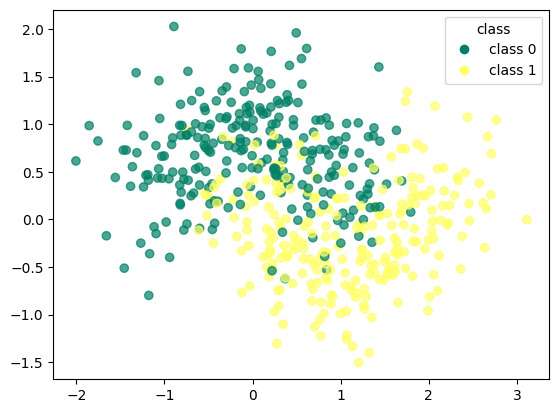

In [361]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

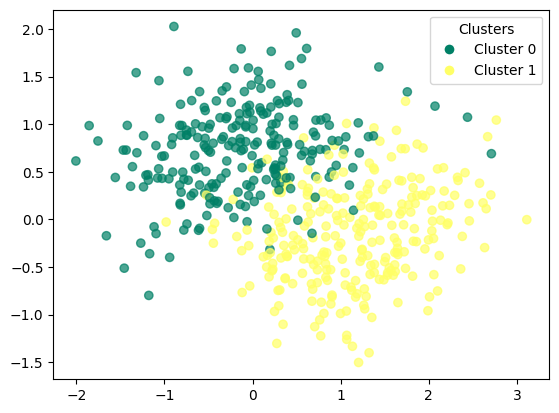

In [362]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

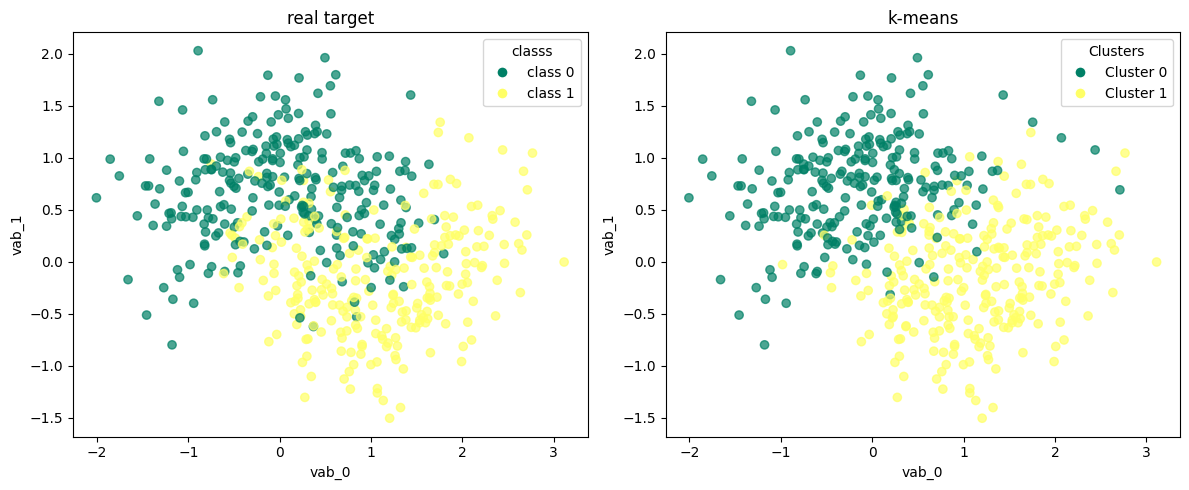

In [363]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

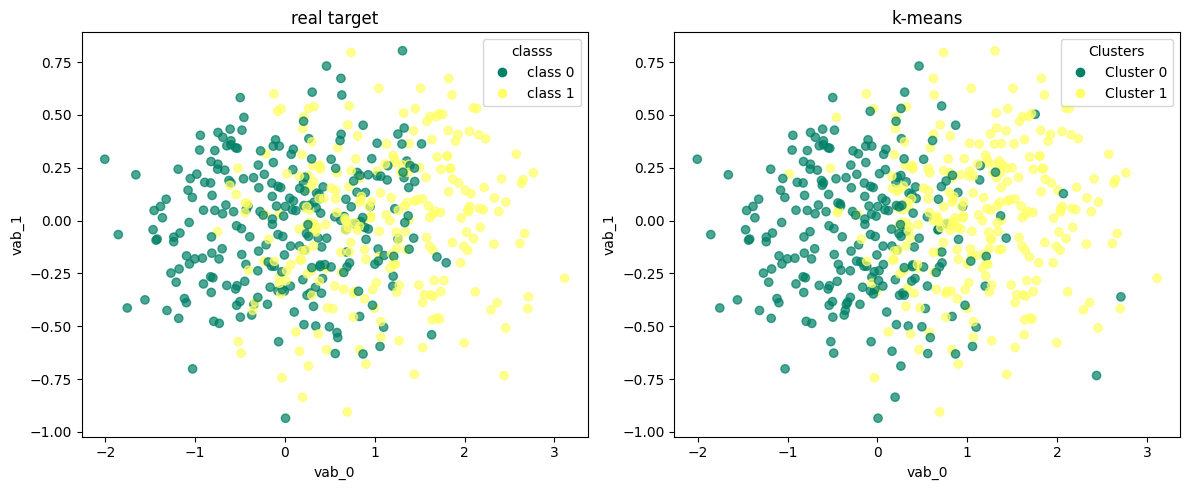

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

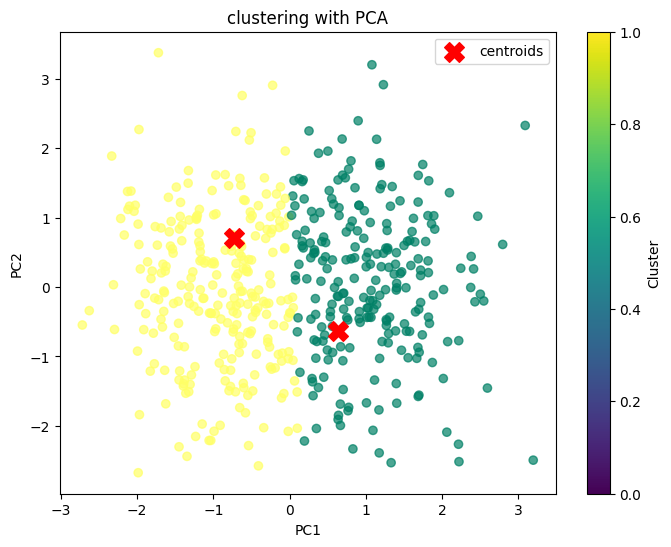

In [365]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

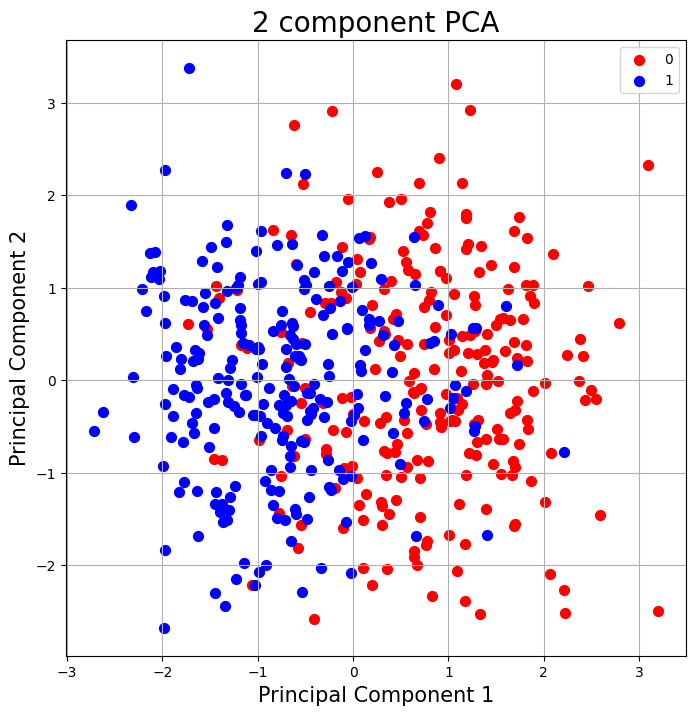

In [366]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### clustering with t-SNE

In [367]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++')

In [368]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2)

In [369]:
df_tsne_kmeans = df_moons.copy()

In [370]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [371]:
df_tsne_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  k_means  kmeans_tsne  
0   -0.116329  0.120439 -0.435750       1        1            1  
1    0.195565  0.134176 -0.002394       0        1            1  
2    0.206120  0.217004  0.493615       1        1            1  
3    0.211552 -0.669096  0.564241       0        0            0  
4   -0.042675  0.454414  0.123202       0        0            1  
..        ...       ...       ...     ...      ...          ...  
495  0.101575 -0.724034  0.137405       0        0            0  
496 -0.318303  0.099845  0.059909       1        1            0  
497  0.083491  0.166666 -0.182538       1        0            1  
498 -0.332843  0.228447  0.366129       1        1            0  
499 -0.059175 -0.443205  0.170458       0        0            0  

[500 rows x 13 columns]

In [372]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.518
accuracy after: 0.518


In [373]:
df_tsne_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831221 -0.183155 -0.610275 -0.372675  0.154214  0.465189 -0.342371   
1    1.378418  0.961775  0.156507 -0.802705  0.147672 -0.298525 -0.134279   
2    1.220799 -0.440707  0.290712 -0.510053  0.061324 -0.237051  0.275409   
3    0.093588  1.139428  0.337904 -0.047226 -0.000380  0.180282  0.040852   
4    0.555413  1.690320  0.018309 -0.486740 -0.274138 -0.638798 -0.327071   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.298947  1.073511 -0.222281  0.256768 -0.216905 -0.094822 -0.048793   
496  0.355484 -0.273658 -0.030744  0.085722  0.150746  0.118143 -0.602208   
497  0.019248  0.187757 -0.236866  0.221292 -0.076928  0.265718  0.363006   
498  1.116456 -0.711441  0.267663  0.065437 -0.088413 -0.365645 -0.145632   
499 -0.128893  1.791955  0.274881  0.745806 -0.138122  0.178972 -0.354406   

        vab_8     vab_9    vab_10  target  k_means  kmeans_tsne  
0   -0.116329  0.120439 -0.435750       1        1            1  
1    0.195565  0.134176 -0.002394       0        1            1  
2    0.206120  0.217004  0.493615       1        1            1  
3    0.211552 -0.669096  0.564241       0        0            0  
4   -0.042675  0.454414  0.123202       0        0            1  
..        ...       ...       ...     ...      ...          ...  
495  0.101575 -0.724034  0.137405       0        0            0  
496 -0.318303  0.099845  0.059909       1        1            0  
497  0.083491  0.166666 -0.182538       1        0            1  
498 -0.332843  0.228447  0.366129       1        1            0  
499 -0.059175 -0.443205  0.170458       0        0            0  

[500 rows x 13 columns]

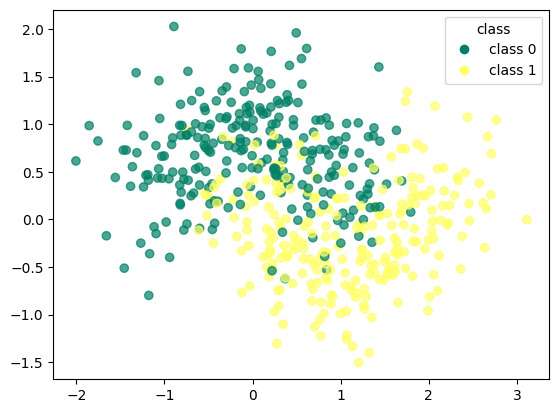

In [374]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

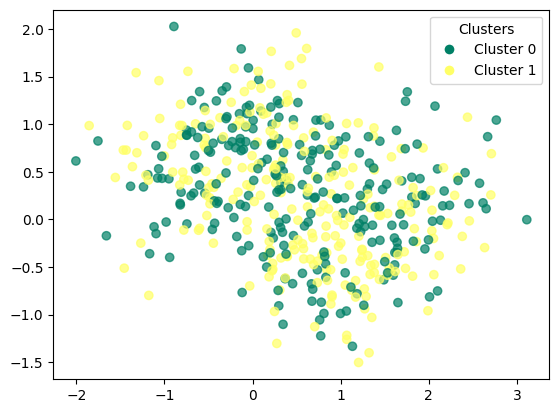

In [375]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

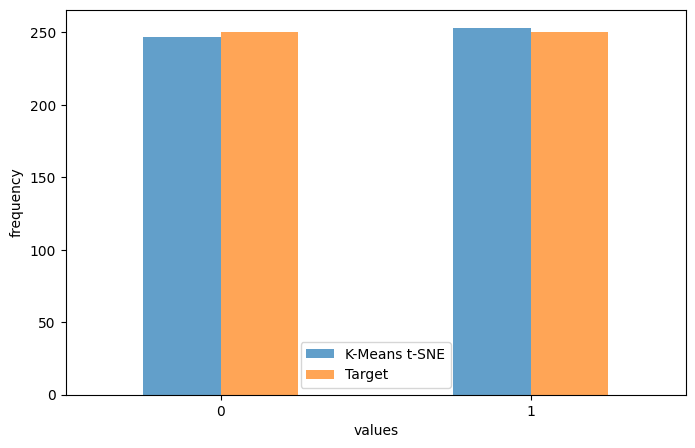

In [376]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [377]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[128 122]
 [119 131]]


In [378]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.52      0.51      0.52       250
           1       0.52      0.52      0.52       250

    accuracy                           0.52       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.52      0.52      0.52       500



In [379]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       250
           1       0.78      0.83      0.81       250

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500



In [380]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       250
           1       0.80      0.85      0.83       250

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



# non linear dataset - circles

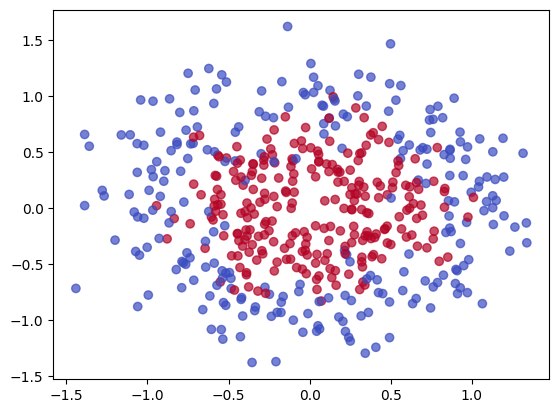

In [381]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [382]:
df3

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    -0.469004   0.323509   0.610358  -0.216675  -0.185385  -0.036174   
1     0.125867   1.048157  -0.303482   0.667556  -0.679128  -0.046083   
2    -0.386288   0.042201  -0.078252  -0.275869   1.150837  -0.381553   
3    -0.494481  -0.578267   0.781133   1.472623   0.125257  -0.331546   
4    -0.714102   0.865415  -0.842002  -0.354514   0.408041   0.588172   
..         ...        ...        ...        ...        ...        ...   
495  -0.854312   0.509894  -0.272863  -0.091545  -0.515061  -0.589471   
496   0.600061  -0.021119  -0.401521   0.827257  -0.126440  -1.220853   
497  -0.715531   0.630037   0.899207  -0.426384   0.023360  -0.349785   
498  -0.318829  -0.743461  -0.502848   0.018824   0.580606   0.804039   
499  -1.042015   0.962384  -0.667413  -0.062039   0.818053   0.411430   

     Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0     0.026010   0.063587   0.279116   -0.086313    0.471597    0.222974   
1     0.483459  -0.361537   0.154778    0.271670   -0.430262   -0.036239   
2     0.502465  -0.196401  -0.543318    0.051407    0.324547    0.460255   
3     0.226437  -0.133106   0.462983   -0.648582    1.184167    0.428024   
4    -0.636119   0.356513  -0.973670   -0.044668    0.556023   -0.275758   
..         ...        ...        ...         ...         ...         ...   
495   1.048564   0.151307  -0.416567    0.408302   -0.589173   -0.548006   
496   0.605033  -0.153191  -0.924704   -0.158342    0.260502    0.202025   
497  -0.771096   0.442764   0.231635    0.141839    0.213395   -0.342736   
498   0.397716   0.014587   0.134892    0.005797   -0.512972    0.012324   
499  -0.461560  -0.036215  -0.417188   -0.031257    0.520554    0.326504   

     Target  
0         1  
1         0  
2         1  
3         0  
4         0  
..      ...  
495       0  
496       1  
497       1  
498       1  
499       0  

[500 rows x 13 columns]